<a href="https://colab.research.google.com/github/TusKy-M/Handwritten-Eqn-Solve/blob/main/Segmentation_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Segmeantation And recognition of Handwritten Equations**

**Machine Learning project**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


#OUTPUT_DIR = '/content/drive/My Drive/tested dataset/segmented'

#------------------Functions------------------#
def line_array(array):
        list_x_upper = []
        list_x_lower = []
        for y in range(5, len(array) - 5):
            s_a, s_p = strtline(y, array)
            e_a, e_p = endline(y, array)
            if s_a >= 7 and s_p >= 5:
                list_x_upper.append(y)
            if e_a >= 5 and e_p >= 7:
                list_x_lower.append(y)

        return list_x_upper, list_x_lower
def strtline(y, array):
        count_ahead = 0
        count_prev = 0
        for i in array[y:y+10]:
            if i > 3:
                count_ahead += 1

        for i in array[y-10:y]:
            if i==0:
                count_prev += 1 

        return count_ahead, count_prev
def endline(y, array):
        count_ahead = 0
        count_prev = 0
        for i in array[y:y+10]:
            if i==0:
                count_ahead += 1

        for i in array[y-10:y]:
            if i > 3:
                count_prev += 1

        return count_ahead, count_prev


def end_line_array(array, a):
        list_endlines = []
        for y in range(len(array)):
            e_p, e_a = endline_word(y, array, a)
            # print(e_p, e_a)
            if e_a >= int(1.5*a) and e_p >= int(0.7*a):
                list_endlines.append(y)
        return list_endlines

def refine_array(array_upper, array_lower):
        upperlines = []
        lowerlines = []
        for y in range(len(array_upper)-1):
            if array_upper[y] + 5 < array_upper[y+1]:
                upperlines.append(array_upper[y]-10)
        for y in range(len(array_lower)-1):
            if array_lower[y] + 5 < array_lower[y+1]:
                lowerlines.append(array_lower[y]+10)

        upperlines.append(array_upper[-1]-10)
        lowerlines.append(array_lower[-1]+10)

        return upperlines, lowerlines


def get_letter_rect(k, contours):
        "Helper function for properly identifying '=' symbol. OpenCV"
        "will treat 2 dashes of 'sign' as separate contours, thus this"
        "will help to identify and merge them into a single '=' contour"
        valid = True
        x,y,w,h = cv2.boundingRect(contours[k])
        for i in range(len(contours)):
            cnt = contours[i]
            if i == k:
                continue
            elif cv2.contourArea(cnt) < 50:
                continue

            x1,y1,w1,h1 = cv2.boundingRect(cnt)

            if abs(x1 + w1/2 - (x + w/2)) < 50:
                if y1 > y:
                    h = abs(y - (y1 + h1))
                    w = abs(x - (x1 + w1))
                else:
                    valid = False
                break

        return (valid,x,y,w,h)
def letter_seg(lines_img, i,is_exp):
        copy_img = lines_img[i].copy()
        #x_linescopy = x_lines[i].copy()

        letter_img = []
        letter_k = []

        contours = cv2.findContours(copy_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[0]
        for k in range(len(contours)):
            cnt = contours[k]
            if cv2.contourArea(cnt) < 50:
                continue

            valid,x,y,w,h = get_letter_rect(k, contours)
            if valid:
                letter_k.append((x,y,w,h))

        letter = sorted(letter_k, key=lambda student: student[0])
        #print(letter)

        #word = 1
        #letter_index = 0
        print(letter)
        avg = 0
        sum=0
        for e in range(len(letter)):
          sum = sum +letter[e][1] + letter[e][3]


        avg = (sum / len(letter)) - 50


        print(avg)
        img1 = []
        for e in range(len(letter)):
            #if(letter[e][0]<x_linescopy[0]):
                #letter_index += 1
                letter_img_tmp = lines_img[i][letter[e][1]-5:letter[e][1]+letter[e][3]+5,letter[e][0]-5:letter[e][0]+letter[e][2]+5]
                w,h = letter_img_tmp.shape
                if w<50 and h<50:
                  continue
                letter_img = cv2.resize(letter_img_tmp, dsize =(45, 45), interpolation = cv2.INTER_AREA)
                cv2_imshow(letter_img)
                if (letter[e][1]+letter[e][3])<avg :
                  is_exp.append(1)
                else:
                  is_exp.append(0)
                
                #letter_img = letter_img_tmp
                #print(letter_img.shape)
                #cv2.resize(letter_img_tmp, dsize =(45, 45), interpolation = cv2.INTER_AREA)
                #cv2.imwrite(OUTPUT_DIR+str(i+1)+'_'+str(word)+'_'+str(letter_index)+'.jpg', 255-letter_img)
                image.append(255-letter_img)
                img1.append(255-letter_img)
                X.append(letter[e][0])
                Y.append(letter[e][1])
                X1.append(letter[e][2])
                Y1.append(letter[e][3])
                CX.append((letter[e][0]+letter[e][2])/2)
                CY.append((letter[e][1]+letter[e][3])/2)

        #line_img[i] = image
        line_expo[i] = is_exp
        return img1

def adjust_gamma(image,gamma):

    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)                
def image_segmentation(filepath):
        # -------------Thresholding Image--------------#
        print("\n........Program Initiated.......\n")
        src_img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        orig_height, orig_width = src_img.shape

        print("\n Resizing Image........")
        width = 2000
        height = int(width * orig_height / orig_width)
        src_img = cv2.resize(src_img, dsize=(width, height), interpolation=cv2.INTER_AREA)

        print("#---------Image Info:--------#")
        print("\tHeight =", height, "\n\tWidth =", width)
        print("#----------------------------#")
        print("Applying Adaptive Threshold with kernel :- 21 X 21")

        PIXEL_SET = 255
        kernel_size = 21
        normalized_mean = 20
#         bin_img = cv2.adaptiveThreshold(src_img, PIXEL_SET, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, kernel_size,
#                                         normalized_mean)
        print(src_img.shape)
        equ = adjust_gamma(src_img,3.5)
        #plt.imshow(equ,cmap="gray")

        #bin_img = cv2.adaptiveThreshold(equ, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 199, 5) 
        _,bin_img = cv2.threshold(equ,0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        plt.imshow(bin_img,cmap="gray")
#         kernel = np.array([[-1,-1,-1], 
#                    [-1, 9,-1],
#                    [-1,-1,-1]])
#         sharpened = cv2.filter2D(image, -1, kernel)

        print("Noise Removal From Image.........")
#         kernel = np.array([[-1,-1,-1], 
#                    [-1, -9,-1],
#                    [-1,-1,-1]])
        print("image")
        cv2_imshow(bin_img)
        print("image after erosion")
        final_thr = cv2.erode(bin_img,(3,3),iterations = 1)
        cv2_imshow(final_thr)
        print("image after dilation")
        final_thr = cv2.dilate(final_thr,(3,3),iterations = 1)
        cv2_imshow(final_thr)
        #plt.imshow(final_thr,cmap="gray")
        contr_retrival = final_thr.copy()
        #print("coming here")

        # -------------/Thresholding Image-------------#

        # -------------Line Detection------------------#
        print("Beginning Character Semenation..............")
        count_x = np.zeros(shape=(height))
        for y in range(height):
            for x in range(width):
                if bin_img[y][x] == PIXEL_SET:
                    count_x[y] += 1
        
        print(count_x)
        upper_lines, lower_lines = line_array(count_x)
        upperlines, lowerlines = refine_array(upper_lines, lower_lines)
        print(upperlines)
        print(lowerlines)


        if len(upperlines) == len(lowerlines):
            lines = []
            for y in upperlines:
                final_thr[y][:] = PIXEL_SET
            for y in lowerlines:
                final_thr[y][:] = PIXEL_SET
            for y in range(len(upperlines)):
                lines.append((upperlines[y], lowerlines[y]))
        else:
            print("Too much noise in image, unable to process.\nPlease try with another image. Ctrl-C to exit:- ")
            #showimages()
            #k = cv2.waitKey(0)
            #while 1:
                #k = cv2.waitKey(0)
                #if k & 0xFF == ord('q'):
                    #cv2.destroyAllWindows()
            exit()

        lines = np.array(lines)
        no_of_lines = len(lines)
        imag = 0
        imag = cv2.cvtColor(final_thr,cv2.COLOR_GRAY2RGB)
        for x in upper_lines:
          imag = cv2.line(imag, (0,x), (2000,x), (0,225,0), 1)
        for x in lower_lines:
          imag = cv2.line(imag, (0,x), (2000,x), (0,225,0), 1)
        cv2_imshow(imag)
        print("\nGiven Text has   # ", no_of_lines, " #   no. of lines")

        lines_img = []
        #imag = cv2.line(image, start_point, end_point, color, thickness)
        for i in range(no_of_lines):
            lines_img.append(bin_img[lines[i][0]:lines[i][1], :])

        # -------------/Line Detection-----------------#

        # -------------Letter Width Calculation--------#

   #     contours= cv2.findContours(contr_retrival, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    #    cv2.drawContours(src_img, contours, -1, (0, 255, 0), 1)
#
 #       mean_lttr_width = letter_width(contours)
  #      print("\nAverage Width of Each Letter:- ", mean_lttr_width)

        # -------------/Letter Width Calculation-------#

        # --------------Word Detection-----------------#
       # x_lines = []
        #for i in range(len(lines_img)):
         #   x_lines.append(end_wrd_dtct(lines, i, bin_img, mean_lttr_width, width,final_thr))
#
 #       for i in range(len(x_lines)):
  #          x_lines[i].append(width)

        # -------------/Word Detection-----------------#

        # -------------Letter Segmentation-------------#

        for i in range(len(lines)):
            
            is_exp = []
            line_img[i] = letter_seg(lines_img, i,is_exp)
            
            #image=[]

        # ------------\Letter Segmentation-------------#

        # -------------Character segmenting------------#

       # contours = cv2.findContours(final_thr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
       # for cnt in contours:
       #     if cv2.contourArea(cnt) > 20:
       #         x, y, w, h = cv2.boundingRect(cnt)
       #         cv2.rectangle(src_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [ ]:
from google.colab.patches import cv2_imshow


........Program Initiated.......


 Resizing Image........
#---------Image Info:--------#
	Height = 934 
	Width = 2000
#----------------------------#
Applying Adaptive Threshold with kernel :- 21 X 21
(934, 2000)
Noise Removal From Image.........
image


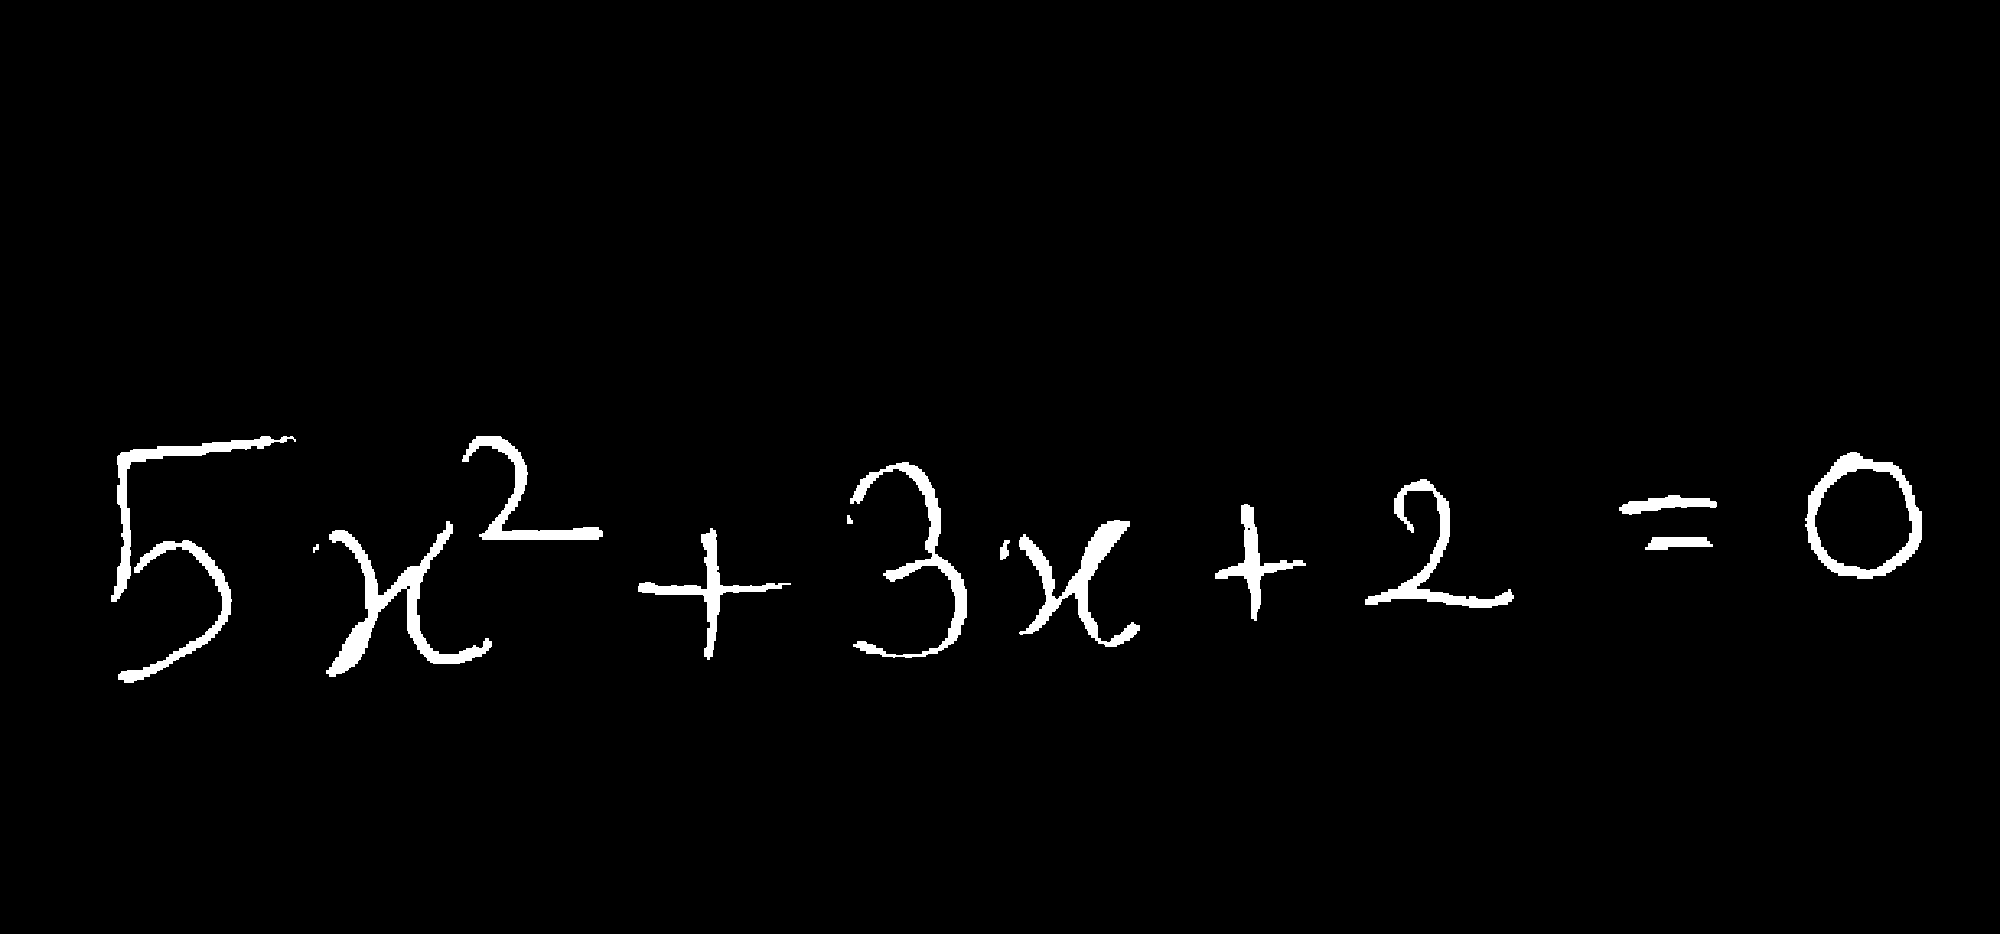

image after erosion


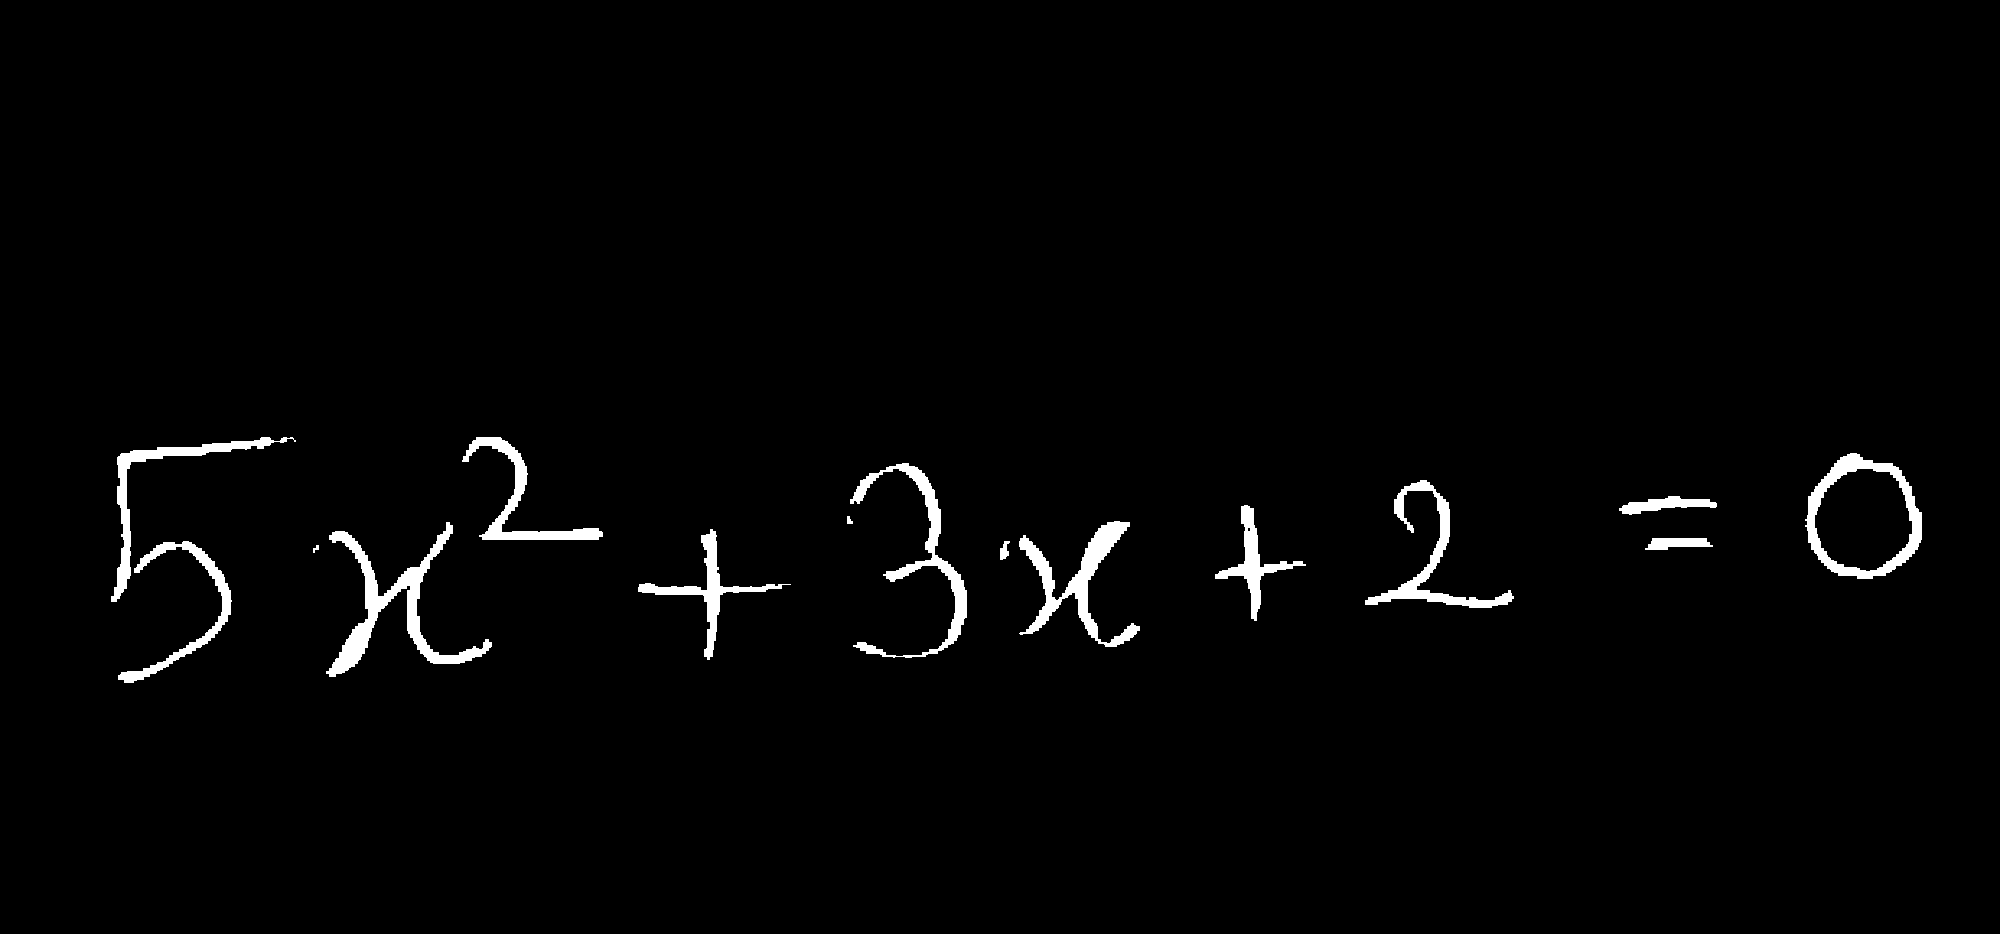

image after dilation


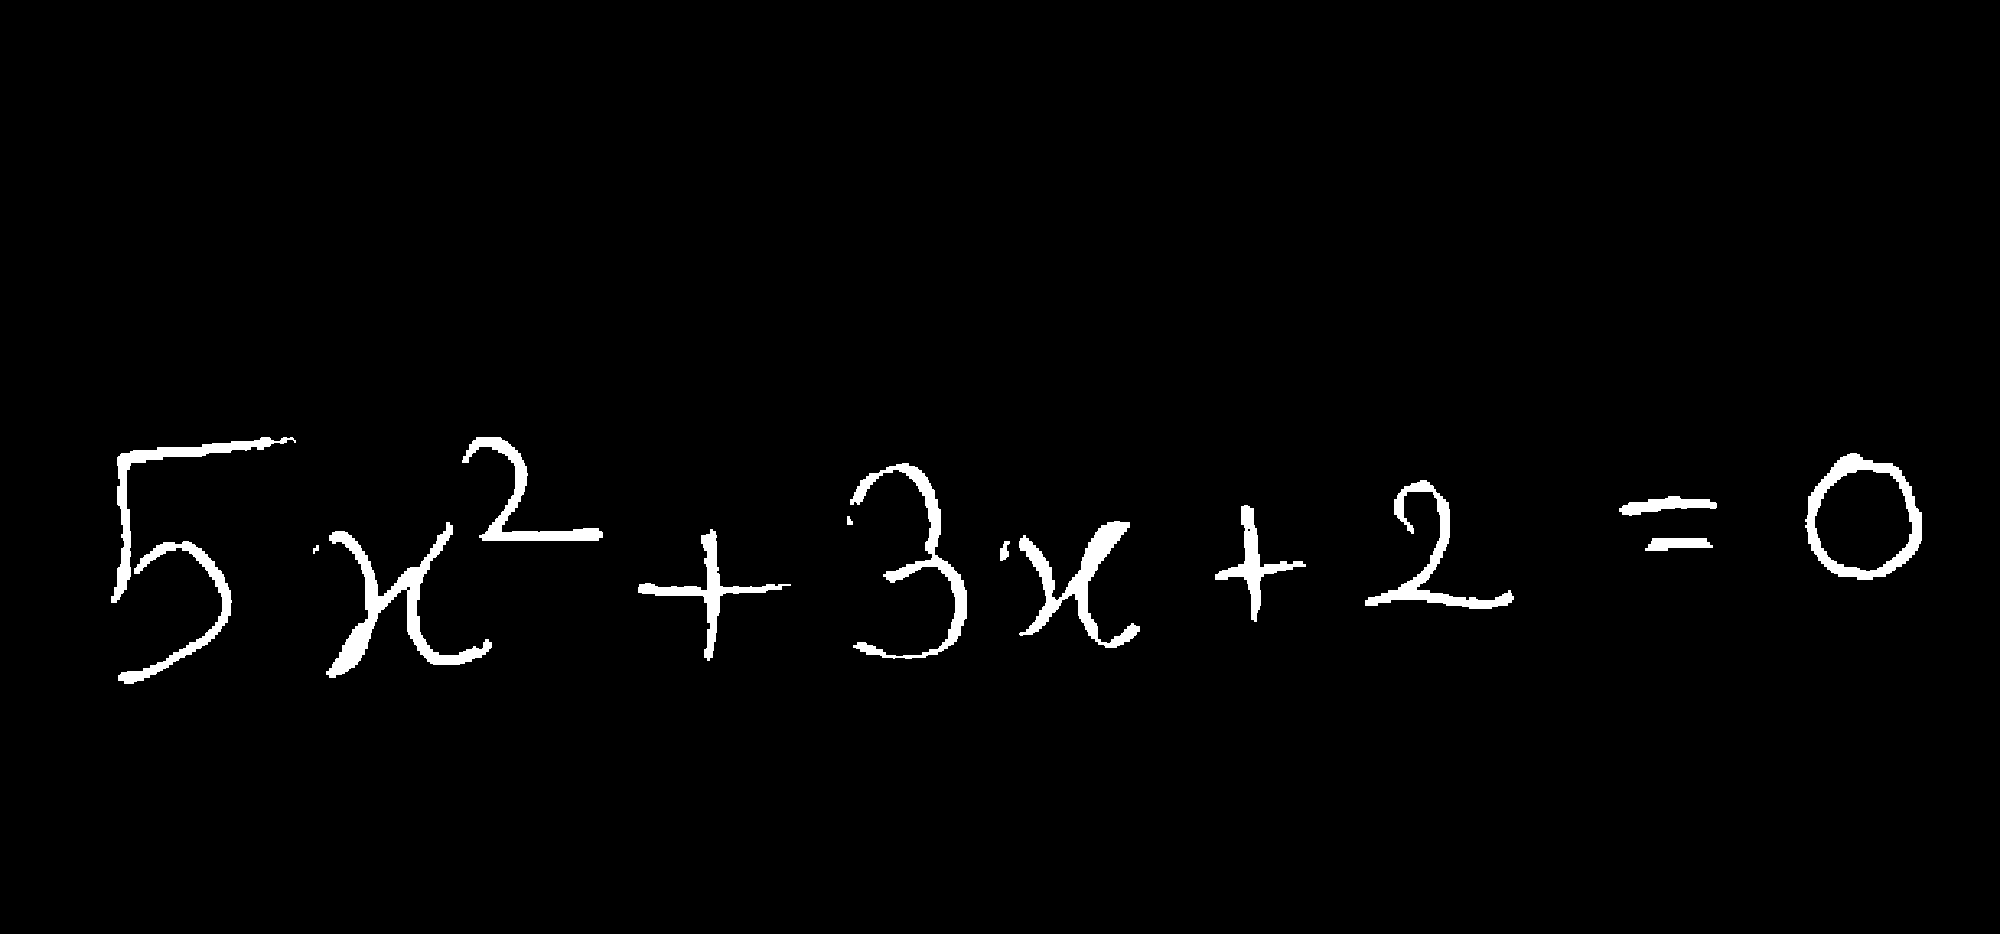

Beginning Character Semenation..............
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  

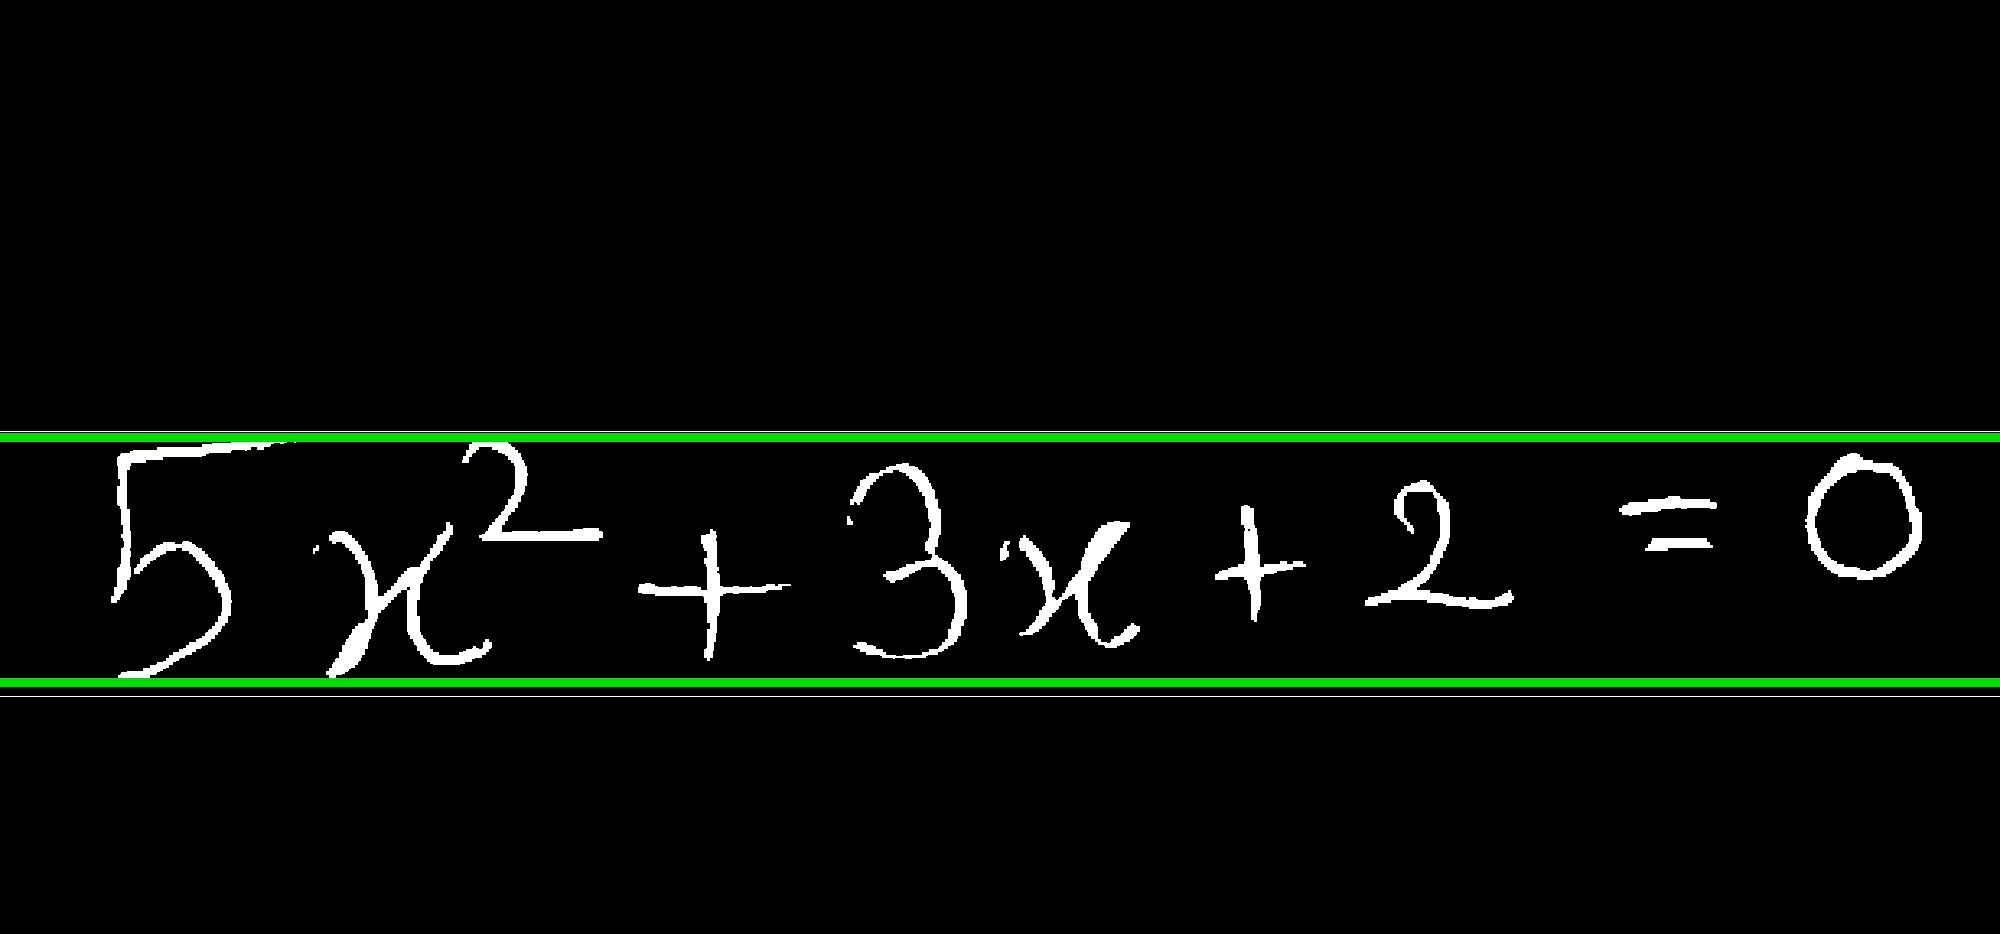


Given Text has   #  1  #   no. of lines
[(111, 5, 121, 247), (326, 90, 166, 156), (462, 5, 141, 104), (638, 97, 153, 132), (850, 31, 117, 196), (1000, 109, 10, 20), (1019, 89, 121, 127), (1215, 73, 91, 117), (1365, 48, 149, 129), (1619, 64, 94, 55), (1805, 21, 117, 127)]
135.63636363636363


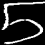

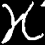

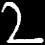

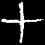

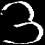

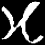

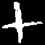

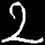

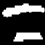

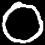

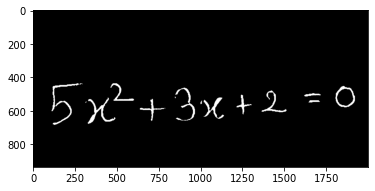

In [ ]:
X=[]
Y=[]
X1=[]
Y1=[]
CX=[]
CY=[]
line_img={}
line_expo = {}
image =[]

get_lines = {}

is_digit=False
is_var=False
is_constant=False
prev_digit=False
prev_var=False
prev_constant=False
other=False
image_segmentation('/content/test21.jpg')

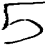

In [ ]:
cv2_imshow(line_img[0][0])

In [ ]:
line_expo

{0: [0, 0, 1, 0, 0, 0, 0, 0, 1, 0]}

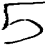

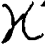

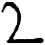

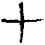

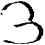

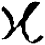

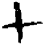

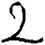

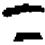

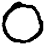

In [ ]:
cnt = 1
for i in range(len(line_img)):
  for j in range(len(line_img[i])):
    #ax1 = plt.subplot(2,len(line_img[i]),cnt)
    cv2_imshow(line_img[i][j])
    cnt+=1

In [ ]:
import math
from scipy import ndimage

In [ ]:
for i in range(len(line_img)):
  for j in range(len(line_img[i])):
    image =  line_img[i][j]
    w,h = image.shape
    if w<40 and h<40:
      line_img[i].pop(j)
      continue
    kernel = np.ones((3,3),np.uint8)
    img = ~image
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    #erosion = cv2.erode(np.array(img),kernel,iterations = 1)
    #dilation = cv2.dilate(np.array(img),kernel,iterations = 1)
    
    blur = cv2.GaussianBlur(img,(3,3),1)

    ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    gray = cv2.resize(th3, (28, 28))
    while np.sum(gray[0]) == 0:
      gray = gray[1:]

    while np.sum(gray[:,0]) == 0:
        gray = np.delete(gray,0,1)

    while np.sum(gray[-1]) == 0:
        gray = gray[:-1]

    while np.sum(gray[:,-1]) == 0:
        gray = np.delete(gray,-1,1)

    rows,cols = gray.shape
    if rows > cols:
        factor = 20.0/rows
        rows = 20
        cols = int(round(cols*factor))
        gray = cv2.resize(gray, (cols,rows))
    else:
        factor = 20.0/cols
        cols = 20
        rows = int(round(rows*factor))
        gray = cv2.resize(gray, (cols, rows))
    colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
    rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
    gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')
    def getBestShift(img):
        cy,cx = ndimage.measurements.center_of_mass(img)

        rows,cols = img.shape
        shiftx = np.round(cols/2.0-cx).astype(int)
        shifty = np.round(rows/2.0-cy).astype(int)

        return shiftx,shifty
    def shift(img,sx,sy):
        rows,cols = img.shape
        M = np.float32([[1,0,sx],[0,1,sy]])
        shifted = cv2.warpAffine(img,M,(cols,rows))
        return shifted
    shiftx,shifty = getBestShift(gray)
    shifted = shift(gray,shiftx,shifty)
    gray = shifted
    line_img[i][j]= gray

In [ ]:
cnt=1
for i in range(len(line_img)):
  for j in range(len(line_img[i])):
    #ax1 = plt.subplot(2,len(line_img[i]),cnt)
    cv2_imshow(line_img[i][j])
    cnt+=1

In [ ]:
for i in range(len(line_img)):
  for j in range(len(line_img[i])):
    line_img[i][j]= np.reshape(line_img[i][j],(1,28,28))

In [ ]:
line_img[0][1].shape

(1, 28, 28)

In [ ]:
#%tensorflow_version 1.x

In [ ]:
#!pip install q keras==2.3.1

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.models import model_from_json
json_file = open('model_final(3).json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/model_weights(CV).h5")#/content/model_final.h5

In [ ]:
s=''
resul = 0
for i in range(len(line_img)):
  s=s+ '\n'
  prev=-1
  for j in range(len(line_img[i])):
    ima=np.array(line_img[i][j])
    ima=ima.reshape(1,1,28,28)
    result=loaded_model.predict(ima)
    resul = np.argmax(result)
    if(line_expo[i][j]==1 and resul!=14):
      s=s+'**'
    if(resul==10):
        prev=2 # prev is 2 when prev char is symbol
        s=s+'+'
    if(resul==11):
        prev=2 # prev is 2 when prev char is symbol
        s=s+'-'
    if(resul==12):
        if(prev==-1):s=s+'x'
        elif(prev==2): s=s+'x'
        elif(prev==1):s=s+'*x'
        else:s=s+'x'
    if(resul==13):
        s=s+'*y'
    if(resul==14):
        s=s+'='
    if(resul==0):
        prev=1
        s=s+'0'
    if(resul==1):
        prev=1
        s=s+'1'
    if(resul==2):
        prev=1
        s=s+'2'
    if(resul==3):
        prev=1
        s=s+'3'
    if(resul==4):
        prev=1
        s=s+'4'
    if(resul==5):
        prev=1
        s=s+'5'
    if(resul==6):
        prev=1
        s=s+'6'
    if(resul==7):
        prev=1
        s=s+'7'
    if(resul==8):
        prev=1
        s=s+'8'
    if(resul==9):
        prev=1
        s=s+'9'
    
print(s)


5*x**2+3*x+2**80


**Solving the recognized equation**

In [ ]:
import cmath  
  
def equationroots( a, b, c):  
  dis = (b**2) - (4 * a*c) 
  ans1 = (-b-cmath.sqrt(dis))/(2 * a)
  ans2 = (-b + cmath.sqrt(dis))/(2 * a) 
  print('The roots are') 
  print(ans1) 
  print(ans2) 
  

In [ ]:
def convert(s):
    print(s)
    s = s[:-2] 
    a =0 if ('x**2' not in s) else 1
    s = s.replace('*x**2','/')
    s=s.replace('x**2','/')
    
    
    b =0 if ('x' not in s) else 1
    s=s.replace('*x','/')
    s=s.replace('x','/')
    
    c =1 if ('/+' in s or '/-' in s) else 0
    l=[]
    temp= s.split('/')
    for str in temp:
      if(str==''):l.append(1)
      else: l.append(int(str)) 
    #print(temp)
    #print(l)
    return l


mlist= convert(s)
a = mlist[0]
b= mlist[1]
c = mlist[2]
equationroots(a,b,c)


5*x**2+3*x+2**80


ValueError: ignored

In [ ]:
line_expo[8]= 0